<a href="https://colab.research.google.com/github/GIGAParviz/pneumonia-chest-prediction-with-CNN/blob/main/pneumonia_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Downloding dataset**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amparviz","key":"94bf65b3008dbf454a4c8a8eb83ff500"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

100% 1.14G/1.14G [00:43<00:00, 29.4MB/s]
100% 1.14G/1.14G [00:43<00:00, 28.5MB/s]


In [7]:
! unzip pneumonia-chest-x-ray-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/normal/IM-0435-0001-0001.jpeg  
  inflating: train/train/normal/IM-0435-0001.jpeg  
  inflating: train/train/normal/IM-0437-0001-0001.jpeg  
  inflating: train/train/normal/IM-0437-0001-0002.jpeg  
  inflating: train/train/normal/IM-0437-0001.jpeg  
  inflating: train/train/normal/IM-0438-0001.jpeg  
  inflating: train/train/normal/IM-0439-0001-0001.jpeg  
  inflating: train/train/normal/IM-0439-0001-0002.jpeg  
  inflating: train/train/normal/IM-0439-0001.jpeg  
  inflating: train/train/normal/IM-0440-0001.jpeg  
  inflating: train/train/normal/IM-0441-0001.jpeg  
  inflating: train/train/normal/IM-0442-0001.jpeg  
  inflating: train/train/normal/IM-0444-0001.jpeg  
  inflating: train/train/normal/IM-0445-0001.jpeg  
  inflating: train/train/normal/IM-0446-0001.jpeg  
  inflating: train/train/normal/IM-0447-0001.jpeg  
  inflating: train/train/normal/IM-0448-0001.jpeg  
  inflating: train/train/normal/IM-0449-

# **Import Important Libraries**

In [15]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , Input , Concatenate , AveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# for index , image in enumerate(os.listdir('train/train/normal')):
#   cv.imread(os.join('train/train/normal' , image))

# **Importing trainign data and data preprocessing**








In [11]:
data = keras.utils.image_dataset_from_directory('train/train' , batch_size=52 , image_size=(256,256))

Found 5216 files belonging to 2 classes.


In [12]:
data = data.map(lambda x,y : (x/255 , y))
batch = data.as_numpy_iterator().next()

In [13]:
batch[0].min()

0.0

In [14]:
batch[0].max()

1.0

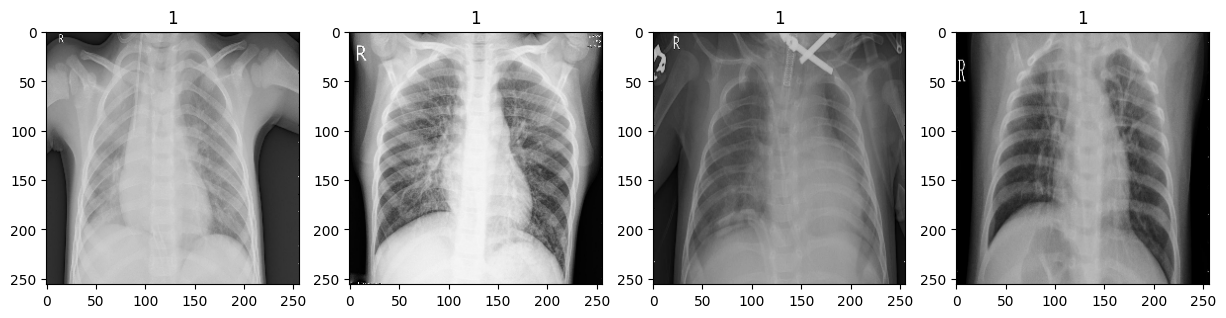

In [16]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][:4]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch[1][inx])
plt.show()

In [17]:
test = keras.utils.image_dataset_from_directory('train/test' , image_size=(256,256) , batch_size=52)

Found 624 files belonging to 2 classes.


In [18]:
test = test.map(lambda x,y:(x/255 , y))

In [19]:
batch2 = test.as_numpy_iterator().next()

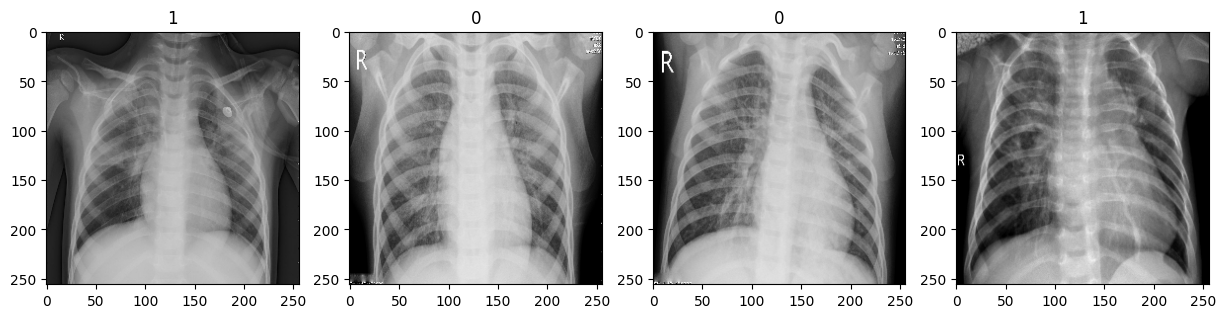

In [20]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch2[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch2[1][inx])
plt.show()

In [21]:
val= keras.utils.image_dataset_from_directory('train/val' , batch_size=52 , image_size=(256 , 256))

Found 16 files belonging to 2 classes.


In [22]:
val = val.map(lambda x,y:(x/255 , y))

In [23]:
batch3 = val.as_numpy_iterator().next()

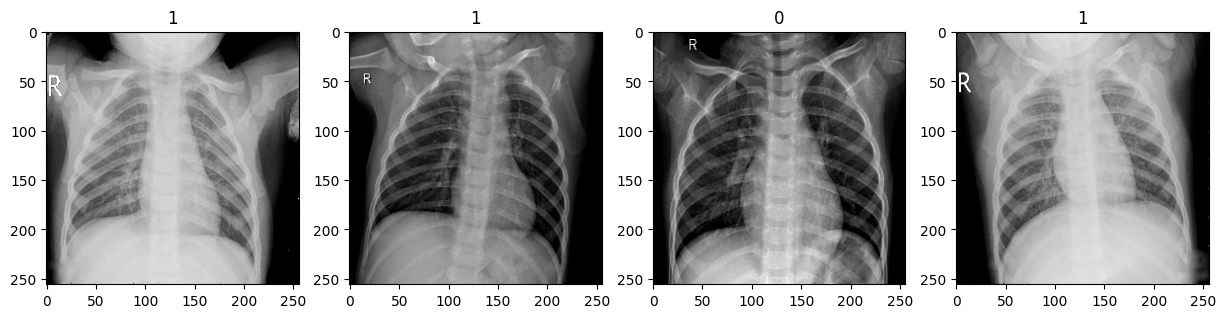

In [24]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch3[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch3[1][inx])
plt.show()

# **Creating convoluntional Neural Network API**

In [34]:
input = Input(shape=(256,256,3))
layer1 = Conv2D(50 , 3 , strides=(2,2) , activation='relu')(input)
layer2 = MaxPooling2D(2)(layer1)
layer3 = Conv2D(100 , 5 , strides=(2,2) , padding='same' , activation='relu')(layer2)
layer4 = MaxPooling2D(2)(layer3)
layer5 = Conv2D(150 , 5 , strides=(2,2) , padding='same' , activation='relu')(layer4)
layer6 = Conv2D(100 , 5 , strides=(2,2) , padding='same' , activation='relu')(layer5)
layer7 = AveragePooling2D(2)(layer6)
flat = Flatten()(layer7)
layer8 = Dense(250 , activation='relu')(flat)
layer9 = Dense(150 , activation='relu')(layer8)
layer10 = Dense(100 , activation='relu')(layer9)
output = Dense(1 , activation='sigmoid')(layer10)

model = Model(inputs=(input) , outputs=(output))

In [35]:
model.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy']
              )

calb = keras.callbacks.ModelCheckpoint('Pnemonia chest x ray.h5' , save_best_only=True)

# **Training the model**

In [54]:
history = model.fit( data , validation_data=(val) , epochs=10  , callbacks=[calb])

Epoch 1/10
101/101 [==============================] - 38s 347ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0064 - val_accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
101/101 [==============================] - 38s 346ms/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.3985 - val_accuracy: 0.8750
Epoch 3/10
101/101 [==============================] - 47s 428ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0973 - val_accuracy: 0.9375
Epoch 4/10
101/101 [==============================] - 38s 352ms/step - loss: 0.0163 - accuracy: 0.9939 - val_loss: 0.1768 - val_accuracy: 0.9375
Epoch 5/10
101/101 [==============================] - 37s 341ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.4276 - val_accuracy: 0.9375
Epoch 6/10
101/101 [==============================] - 39s 361ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 8.2513e-04 - val_accuracy: 1.0000
Epoch 7/10
101/101 [==============================] - 37s 344ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 8/10
101/101 [==============================] - 37s 335ms/step - loss: 7.6911e-05 - accuracy: 1.0000 - val_loss: 0.0355 

# **Evaluating our Model**

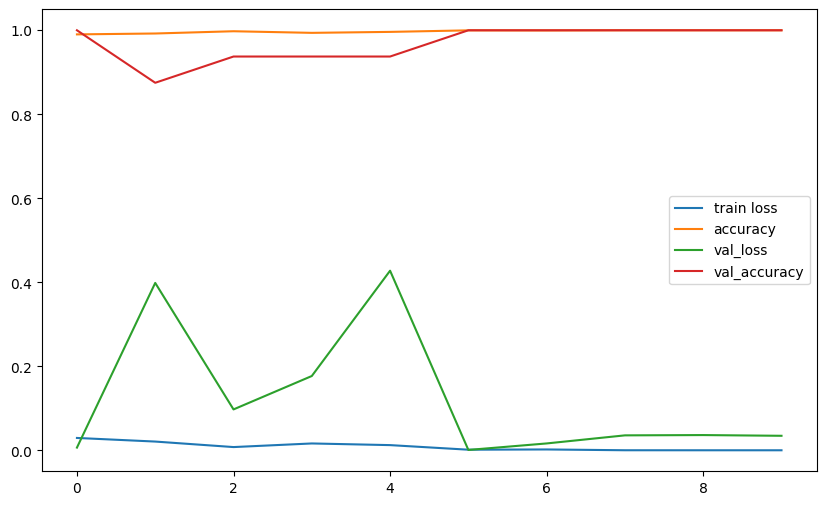

In [56]:
fig , ax = plt.subplots(figsize=(10 ,6))
ax.plot(history.history['loss'] , label= "train loss")
ax.plot(history.history['accuracy'] , label= "accuracy")
ax.plot(history.history['val_loss'] , label= "val_loss")
ax.plot(history.history['val_accuracy'] , label= "val_accuracy")
ax.legend()

In [57]:
batch = test.as_numpy_iterator().next()
batch[0]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [58]:
pre = model.predict(test)

12/12 [==============================] - 3s 110ms/step


In [59]:
pre

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9987590e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6680349e-01],
       [9.9700963e-01],
       [1.0000000e+00],
       [9.6888416e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6805960e-01],
       [1.0000000e+00],
       [2.0891197e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.8253615e-07],
       [9.9999964e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4671893e-02],
       [9.9046564e-01],
       [1.6569287e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.0267631e-03],
       [9.9997652e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [9.9882680e-01],
       [1.0000000e+00],
       [9.9089289e-01],
       [1.4221499e-04],
       [1.0000000e+00],
       [7.9808359e-08],
       [1.000000

In [60]:
model.evaluate(test)

12/12 [==============================] - 6s 231ms/step - loss: 4.0549 - accuracy: 0.7324


[4.054864883422852, 0.7323718070983887]

# **Testing model by another pneumonia x-ray photo from internet**

1/1 [==============================] - 0s 21ms/step
[[0.99999976]]


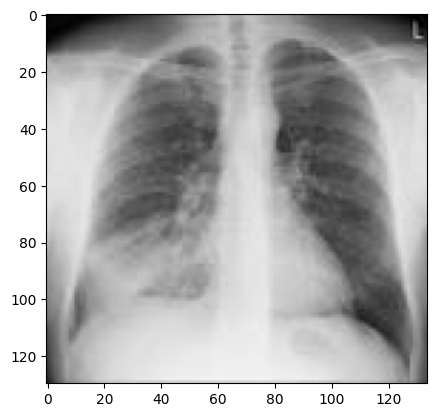

In [62]:
img = cv.imread('/content/images.jfif')

plt.imshow(img)

img = tf.image.resize(img ,(256 ,256))

img = np.expand_dims(img/255 , 0)


# print(img.shape)


pre = model.predict(img)

print(pre)




so our model Predicts Right Congrats <3